# Análisis Forraje Regresion Lineal Multiple

## CONCLUSIÓN: No se obtienen buenas metricas, están muy parecidas a la de regresio lineal simple...

## Realizamos importaciones

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error
from sklearn.model_selection import train_test_split

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

## Leemos nuestro archivo de entrada

In [2]:
resul = pd.read_csv('datos/csv/datos_forraje_3_sondas.csv', sep=",")
resul

,feacha,codigo_gps,coordenada_completa,latitud,longitug,fn_valor_pastoral,dist_laguna_fría,distancia_telsen,dist_gastre,sonda_cercana,sonda_real,acum_anual,acum_verano,tem_max,tem_min,tem_med,viento,humedad
0,11/2015,CG T01,-68.7056907/-43.291952,-43.291952,-68.705691,3.6,1.437643,2.597643,0.477643,Gastre,Laguna Fría,119.8,13.7,14.3,2.6,8.5,14.2,53.7
1,11/2015,CG T02,-68.6608421/-43.2535963,-43.253596,-68.660842,0.6,1.354438,2.514438,0.394438,Gastre,Laguna Fría,119.8,13.7,14.3,2.6,8.5,14.2,53.7
2,11/2015,CG T03,-68.616647/-43.2181445,-43.218145,-68.616647,1.6,1.274792,2.434792,0.314792,Gastre,Laguna Fría,119.8,13.7,14.3,2.6,8.5,14.2,53.7
3,11/2015,CG T04,-68.6180901/-43.1667136,-43.166714,-68.618090,8.0,1.224804,2.384804,0.264804,Gastre,Laguna Fría,119.8,13.7,14.3,2.6,8.5,14.2,53.7
4,11/2015,CG T05,-68.6390379/-43.1237455,-43.123745,-68.639038,4.4,1.202783,2.362783,0.242783,Gastre,Laguna Fría,119.8,13.7,14.3,2.6,8.5,14.2,53.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,01/2017,CT2 T21,-65.9446227/-42.6019474,-42.601947,-65.944623,15.4,2.013430,0.853430,2.973430,Telsen,Telsen,215.6,53.5,19.8,7.2,13.6,5.1,48.6
196,01/2017,CT2 T22,-65.9904844/-42.577312,-42.577312,-65.990484,11.2,1.992204,0.832204,2.952204,Telsen,Telsen,215.6,53.5,19.8,7.2,13.6,5.1,48.6
197,01/2017,CT2 T23,-66.0338334/-42.5443476,-42.544348,-66.033833,13.0,1.981819,0.821819,2.941819,Telsen,Telsen,215.6,53.5,19.8,7.2,13.6,5.1,48.6
198,01/2017,CT2 T24,-66.082257/-42.5184357,-42.518436,-66.082257,11.4,1.959307,0.799307,2.919307,Telsen,Telsen,215.6,53.5,19.8,7.2,13.6,5.1,48.6


## Matriz de Correlación

<AxesSubplot:>

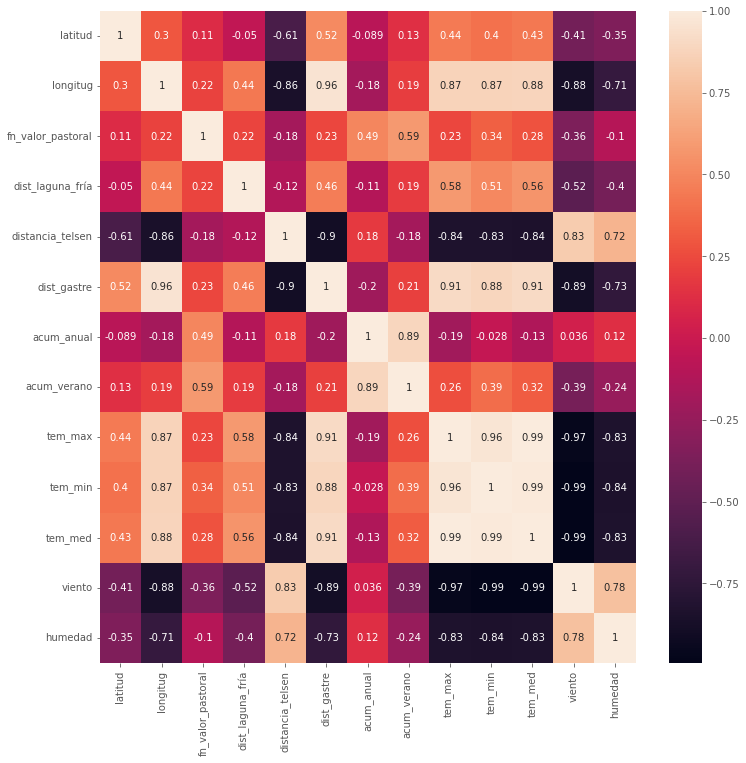

In [3]:
correlation_mat = resul.corr()
fig, ax = plt.subplots(figsize = (12, 12))
sns.heatmap(correlation_mat, annot = True, ax = ax)

Segun la matriz el valor pastoral esta medianamente correlacionado con la lluvia: 0.49 para anual y 0.59 para el verano. Y una baja correlacion para temperatura minimia con 0.34.

## METRICAS UTILIZADAS

- *Varianza explicada*: Representa el porcentaje de la varianza de la variable de salida que es explicado por el modelo. O sea esta métrica evalúa la variación o dispersión de los puntos de datos. **explained_variance_score** La mejor puntuación posible es 1.0,los valores más bajos son peores. 
- *Error medio absoluto*: Es la media de las diferencias absolutas entre el valor objetivo y el predicho. Al no elevar al cuadrado, no penaliza los errores grandes, lo que la hace no muy sensible a valores anómalos, por lo que no es una métrica recomendable en modelos en los que se deba prestar atención a éstos. **mean_absolute_error MAE** Mientras mas cercano a cero mejor.
- *Error cuadrático medio*: Es simplemente la media de las diferencias entre el valor objetivo y el predicho al cuadrado. Al elevar al cuadrado los errores, magnifica los errores grandes, por lo que hay que utilizarla con cuidado cuando tenemos valores anómalos en nuestro conjunto de datos. **mean_squared_error MSE** Mientras mas cercano a cero mejor.Las unidades de la puntuación de error coinciden con las unidades del valor objetivo que se predice.
- *Raíz cuadrada de la media del error al cuadrado*: Es igual a la raíz cuadrada de la métrica anterior. La ventaja de esta métrica es que presenta el error en las mismas unidades que la variable objetivo, lo que la hace más fácil de entender. **RMSE**. Mientras mas cercano a cero mejor. Las unidades de la puntuación de error coinciden con las unidades del valor objetivo que se predice.
- *R cuadrado*: también llamado coeficiente de determinación. Esta métrica difiere de las anteriores, ya que compara nuestro modelo con un modelo básico que siempre devuelve como predicción la media de los valores objetivo de entrenamiento. La comparación entre estos dos modelos se realiza en base a la media de los errores al cuadrado de cada modelo. Los valores que puede tomar esta métrica van desde menos infinito a 1. **r2_score R2** Cuanto más cercano a 1 sea el valor de esta métrica, mejor será nuestro modelo. 

## Primera Predicción

Variables independientes: 
- mm de lluvia acumulados en Verano
- mm de lluvia acumulados Anual

Variables dependientes:
- Valor Pastoral

In [4]:
X_multiple = resul[['acum_anual','acum_verano']]
y_multiple = resul[['fn_valor_pastoral']]

#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X_multiple, y_multiple, test_size=0.4)

lr_multiple = linear_model.LinearRegression()

lr_multiple.fit(X_train, y_train)

LinearRegression()

In [5]:
Y_pred_multiple = lr_multiple.predict(X_test)

print('Precisión del modelo:')
print(str(round(lr_multiple.score(X_train, y_train),4))+'%')

print('Varianza Explicada:')
print(str(round(explained_variance_score(y_test, Y_pred_multiple),4)))
print('MAE:')
print(str(round(mean_absolute_error(y_test, Y_pred_multiple),4)))
print('MSE:')
print(str(round(mean_squared_error(y_test, Y_pred_multiple),4)))
print('RMSE:')
print(str(np.sqrt(round(mean_squared_error(y_test, Y_pred_multiple),4))))
print('R2:')
print(str(round(r2_score(y_test, Y_pred_multiple),4)))

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', lr_multiple.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', lr_multiple.intercept_)

Precisión del modelo:
0.3499%
Varianza Explicada:
0.3422
MAE:
3.6804
MSE:
24.1263
RMSE:
4.911853010830027
R2:
0.3415
Coefficients: 
 [[-0.01395184  0.22125941]]
Independent term: 
 [2.85366948]


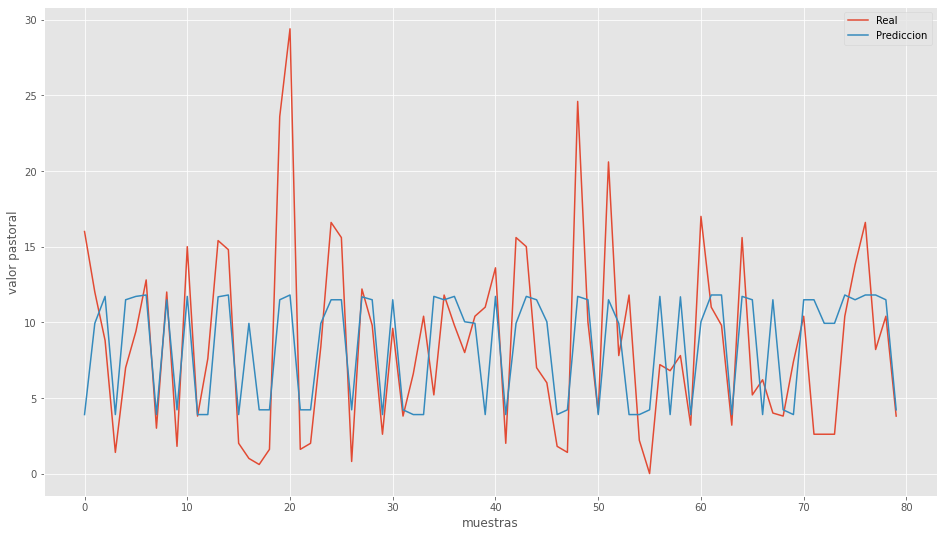

In [6]:
plt.plot(range(len(y_test)),y_test,label="Real")
plt.plot(range(len(Y_pred_multiple)),Y_pred_multiple,label="Prediccion")
 #Mostrar imagen
plt.xlabel('muestras')
# Set the y axis label of the current axis.
plt.ylabel('valor pastoral')
# Set a title of the current axe
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

## Segunda Predicción

Variables independientes: 
- temperatura promedio minima anual
- mm de lluvia acumulados Anual

Variables dependientes:
- Valor Pastoral

In [7]:
X_multiple = resul[['acum_anual','tem_min']]
y_multiple = resul[['fn_valor_pastoral']]

#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X_multiple, y_multiple, test_size=0.4)

lr_multiple = linear_model.LinearRegression()

lr_multiple.fit(X_train, y_train)

LinearRegression()

In [8]:
Y_pred_multiple = lr_multiple.predict(X_test)

print('Precisión del modelo:')
print(str(round(lr_multiple.score(X_train, y_train),4))+'%')

print('Varianza Explicada:')
print(str(round(explained_variance_score(y_test, Y_pred_multiple),4)))
print('MAE:')
print(str(round(mean_absolute_error(y_test, Y_pred_multiple),4)))
print('MSE:')
print(str(round(mean_squared_error(y_test, Y_pred_multiple),4)))
print('RMSE:')
print(str(np.sqrt(round(mean_squared_error(y_test, Y_pred_multiple),4))))
print('R2:')
print(str(round(r2_score(y_test, Y_pred_multiple),4)))

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', lr_multiple.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', lr_multiple.intercept_)

Precisión del modelo:
0.3747%
Varianza Explicada:
0.3676
MAE:
3.3462
MSE:
17.5743
RMSE:
4.1921712751270075
R2:
0.3309
Coefficients: 
 [[0.04439105 1.24564857]]
Independent term: 
 [-5.81560059]


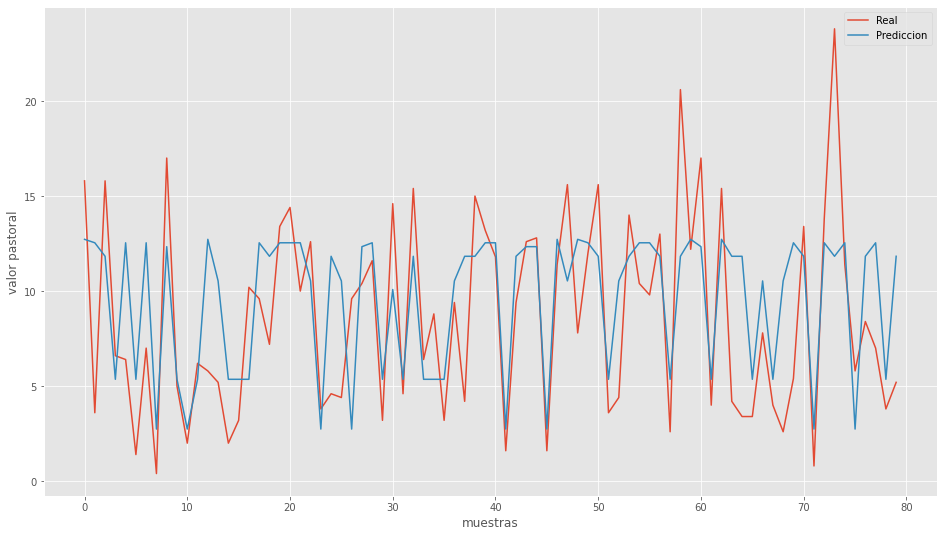

In [9]:
plt.plot(range(len(y_test)),y_test,label="Real")
plt.plot(range(len(Y_pred_multiple)),Y_pred_multiple,label="Prediccion")
 #Mostrar imagen
plt.xlabel('muestras')
# Set the y axis label of the current axis.
plt.ylabel('valor pastoral')
# Set a title of the current axe
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

## Tercera Predicción

Variables independientes: 
- temperatura promedio maxima anual
- temperatura promedio minima anual
- temperatura promedio media anual
- humedad
- viento
- mm de lluvia acumulado Verano
- mm de lluvia acumulados Anual

Variables dependientes:
- Valor Pastoral

In [10]:
X_multiple = resul[['acum_anual','acum_verano', 'tem_max', 'tem_min', 'tem_med', 'viento', 'humedad']]
y_multiple = resul[['fn_valor_pastoral']]

#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X_multiple, y_multiple, test_size=0.4)

lr_multiple = linear_model.LinearRegression()

lr_multiple.fit(X_train, y_train)

LinearRegression()

In [11]:
Y_pred_multiple = lr_multiple.predict(X_test)

print('Precisión del modelo:')
print(str(round(lr_multiple.score(X_train, y_train),4))+'%')

print('Varianza Explicada:')
print(str(round(explained_variance_score(y_test, Y_pred_multiple),4)))
print('MAE:')
print(str(round(mean_absolute_error(y_test, Y_pred_multiple),4)))
print('MSE:')
print(str(round(mean_squared_error(y_test, Y_pred_multiple),4)))
print('RMSE:')
print(str(np.sqrt(round(mean_squared_error(y_test, Y_pred_multiple),4))))
print('R2:')
print(str(round(r2_score(y_test, Y_pred_multiple),4)))

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', lr_multiple.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', lr_multiple.intercept_)

Precisión del modelo:
0.4909%
Varianza Explicada:
0.3442
MAE:
3.8525
MSE:
25.6905
RMSE:
5.068579682711913
R2:
0.3389
Coefficients: 
 [[-0.07817321  0.3719959  -3.11557084  1.5258625  -0.92800057 -2.3334747
   0.46511708]]
Independent term: 
 [62.9462401]


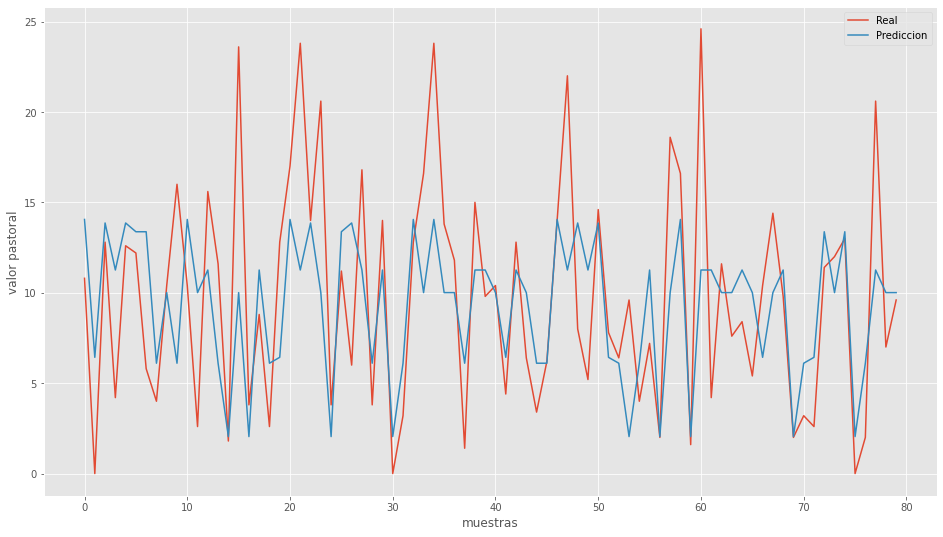

In [12]:
plt.plot(range(len(y_test)),y_test,label="Real")
plt.plot(range(len(Y_pred_multiple)),Y_pred_multiple,label="Prediccion")
 #Mostrar imagen
plt.xlabel('muestras')
# Set the y axis label of the current axis.
plt.ylabel('valor pastoral')
# Set a title of the current axe
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

## Cuarta predicción

Variables independientes (agrupadas por mm lluvia anual): 
- temperatura promedio maxima anual
- temperatura promedio minima anual
- temperatura promedio media anual
- humedad
- viento
- mm de lluvia acumulado Verano
- mm de lluvia acumulados Anual

Variables dependientes:
- Valor Pastoral

In [13]:
df = pd.read_csv('datos/csv/datos_forraje_3_sondas.csv', sep=",")
df = df.drop(['codigo_gps', 'coordenada_completa', 'latitud','longitug', 'dist_laguna_fría','distancia_telsen','dist_gastre'], axis=1)
df

,feacha,fn_valor_pastoral,sonda_cercana,sonda_real,acum_anual,acum_verano,tem_max,tem_min,tem_med,viento,humedad
0,11/2015,3.6,Gastre,Laguna Fría,119.8,13.7,14.3,2.6,8.5,14.2,53.7
1,11/2015,0.6,Gastre,Laguna Fría,119.8,13.7,14.3,2.6,8.5,14.2,53.7
2,11/2015,1.6,Gastre,Laguna Fría,119.8,13.7,14.3,2.6,8.5,14.2,53.7
3,11/2015,8.0,Gastre,Laguna Fría,119.8,13.7,14.3,2.6,8.5,14.2,53.7
4,11/2015,4.4,Gastre,Laguna Fría,119.8,13.7,14.3,2.6,8.5,14.2,53.7
...,...,...,...,...,...,...,...,...,...,...,...
195,01/2017,15.4,Telsen,Telsen,215.6,53.5,19.8,7.2,13.6,5.1,48.6
196,01/2017,11.2,Telsen,Telsen,215.6,53.5,19.8,7.2,13.6,5.1,48.6
197,01/2017,13.0,Telsen,Telsen,215.6,53.5,19.8,7.2,13.6,5.1,48.6
198,01/2017,11.4,Telsen,Telsen,215.6,53.5,19.8,7.2,13.6,5.1,48.6


In [14]:
df = df.groupby(by='acum_anual',as_index=False).mean()
df

,acum_anual,fn_valor_pastoral,acum_verano,tem_max,tem_min,tem_med,viento,humedad
0,119.8,2.245161,13.7,14.3,2.6,8.5,14.2,53.7
1,142.3,5.865000,13.7,14.3,3.9,9.1,12.0,52.1
2,156.1,11.540000,42.3,19.8,7.2,13.6,5.1,48.6
3,160.7,1.200000,42.3,20.0,7.3,13.6,6.3,40.9
4,163.5,6.700000,42.3,20.0,7.3,13.6,6.3,40.9
5,206.9,15.200000,53.5,19.8,7.2,13.6,5.1,48.6
6,215.6,11.155556,53.5,19.8,7.2,13.6,5.1,48.6
7,288.1,12.348387,58.2,14.3,3.9,9.1,12.0,52.1
8,304.1,10.687805,58.2,14.3,3.9,9.1,12.0,52.1


<AxesSubplot:>

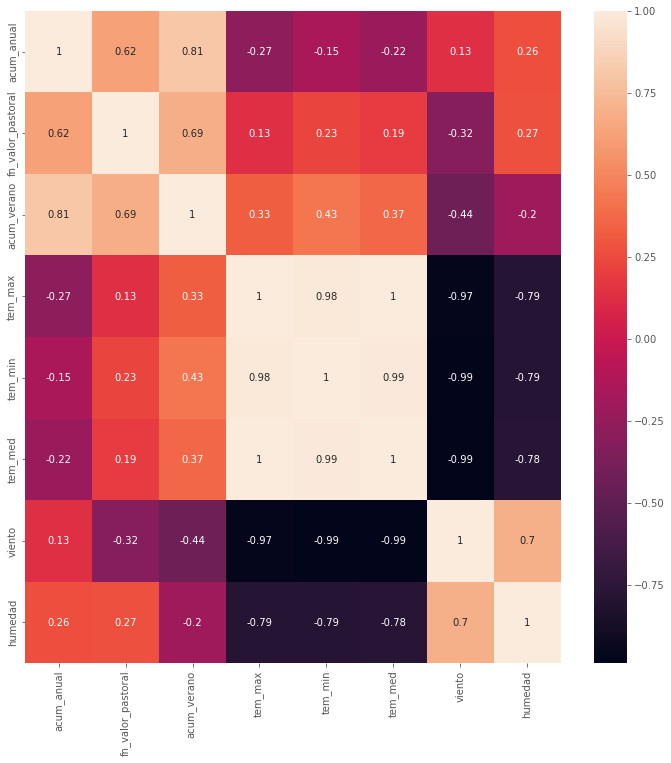

In [15]:
correlation_mat = df.corr()
fig, ax = plt.subplots(figsize = (12, 12))
sns.heatmap(correlation_mat, annot = True, ax = ax)

Según la matriz, el valor pastoral esta correlacionado en un 0.62 con la lluvia acumulada anual y 0.69 con la luvia acumulada en el verano. Y otras correlaciones mas bajan son 0.27 para humedad y 0.23 con temperatura minima. Hay una correlacion negativa de -0.32 para el viento

In [16]:
X_multiple = df[['acum_anual','acum_verano', 'tem_max', 'tem_min', 'tem_med', 'viento', 'humedad']]
y_multiple = df[['fn_valor_pastoral']]

#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X_multiple, y_multiple, test_size=0.4)

lr_multiple = linear_model.LinearRegression()

lr_multiple.fit(X_train, y_train)

LinearRegression()

In [17]:
Y_pred_multiple = lr_multiple.predict(X_test)

print('Precisión del modelo:')
print(str(round(lr_multiple.score(X_train, y_train),4))+'%')

print('Varianza Explicada:')
print(str(round(explained_variance_score(y_test, Y_pred_multiple),4)))
print('MAE:')
print(str(round(mean_absolute_error(y_test, Y_pred_multiple),4)))
print('MSE:')
print(str(round(mean_squared_error(y_test, Y_pred_multiple),4)))
print('RMSE:')
print(str(np.sqrt(round(mean_squared_error(y_test, Y_pred_multiple),4))))
print('R2:')
print(str(round(r2_score(y_test, Y_pred_multiple),4)))

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', lr_multiple.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', lr_multiple.intercept_)

Precisión del modelo:
1.0%
Varianza Explicada:
-0.0793
MAE:
5.3427
MSE:
43.359
RMSE:
6.584755120731522
R2:
-2.159
Coefficients: 
 [[-0.21347093  1.09973891 -0.61258543 -0.16538237 -0.38572442  0.22288964
   1.23200597]]
Independent term: 
 [-44.10257465]


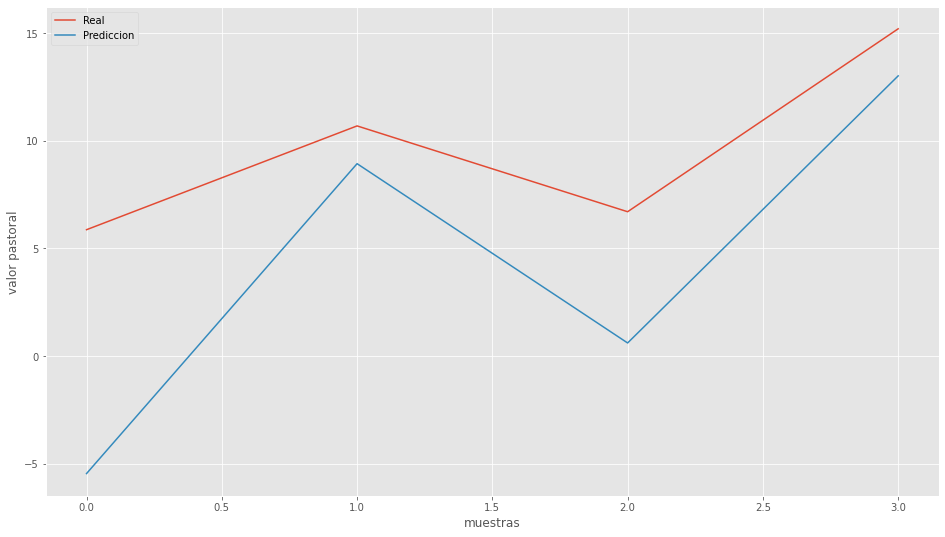

In [18]:
plt.plot(range(len(y_test)),y_test,label="Real")
plt.plot(range(len(Y_pred_multiple)),Y_pred_multiple,label="Prediccion")
 #Mostrar imagen
plt.xlabel('muestras')
# Set the y axis label of the current axis.
plt.ylabel('valor pastoral')
# Set a title of the current axe
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

## CONCLUSIÓN: No se obtienen buenas metricas, están muy parecidas a la de regresio lineal simple